Import data for train/test

In [3]:
import numpy as np
x_train = np.load('/datasets/nicolas_facchinetti/processed_data/EmoDB/first_experiment/x_im_train.npy')
x_test = np.load('/datasets/nicolas_facchinetti/processed_data/EmoDB/first_experiment/x_im_test.npy')
y_train = np.load('/datasets/nicolas_facchinetti/processed_data/EmoDB/first_experiment/y_im_train.npy')
y_test = np.load('/datasets/nicolas_facchinetti/processed_data/EmoDB/first_experiment/y_im_test.npy')

Train test data

# Define a model for SER

In [2]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D, InputLayer

2022-10-19 17:37:09.057933: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
input_size = (256, 256, 3)

In [ ]:
model = Sequential([
    InputLayer(input_shape=input_size),
    #1st hidden layer
    Conv2D(16, (3, 3), activation='relu', padding="same"),
    MaxPool2D((2, 2)),
    #2nd hidden layer
    Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding="same"),
    MaxPool2D((2, 2)),
    # 3rd conv block
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    #ANN
    Flatten(),
    Dropout(0.2),
    Dense(units = 128, activation='relu'),
    Dense(units = 64, activation='relu'),
    #Output layer
    Dense(units= 7, activation='softmax'),
]) 
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto', restore_best_weights=True)

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

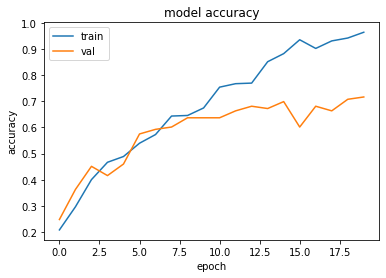

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

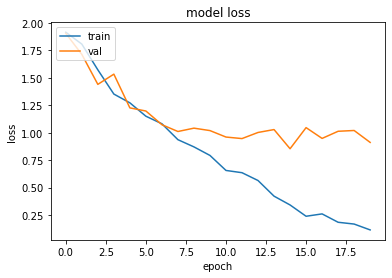

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
_, accuracy_test_original = model.evaluate(x_test, y_test)
print('Accuracy on original test data: {:4.2f}%'.format(accuracy_test_original * 100))

4/4 [==============================] - 0s 52ms/step - loss: 0.8536 - accuracy: 0.6991
Accuracy on original test data: 69.91%


Save the model for future computations

In [10]:
model.save('/datasets/nicolas_facchinetti/trained_models/EmoDB/firstCNN.h5')